In [1]:
from phi.flow import *
import pylab
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib as mpl
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

In [2]:
run_time = 150
bouyancy_factor = 1.0
time_step = 1.0
viscosity = 0.01

In [17]:
velocity = StaggeredGrid(0, extrapolation.ZERO,
x=200, y=200, bounds = Box(x=100, y=100))

smoke = CenteredGrid(0, extrapolation.BOUNDARY,
x=200, y=200, bounds=domain_bounds)

In [18]:
inflow = 0.2* CenteredGrid(SoftGeometryMask(Sphere(x=25, y=15, radius=5)), extrapolation.ZERO,
bounds=smoke.bounds,
resolution = smoke.resolution)

C:\Users\edwar\AppData\Local\Temp\ipykernel_3724\2334877507.py:1: DeprecationWarning: HardGeometryMask and SoftGeometryMask are deprecated. Use field.mask or field.resample instead.
  inflow = 0.2* CenteredGrid(SoftGeometryMask(Sphere(x=25, y=15, radius=5)), extrapolation.ZERO,


In [21]:
def step(prior_velocity, prior_smoke, dt=time_step):

    smoke_next = advect.mac_cormack(
        prior_smoke, prior_velocity, dt) + inflow
    bouyancy_force = smoke_next * (0.0, bouyancy_factor) @ velocity
    velocity_temp = advect.semi_lagrangian(
        prior_velocity, prior_velocity, dt) + bouyancy_force * dt
    velocity_temp = diffuse.explicit(velocity_temp, viscosity, dt)
    velocity_next, pressure = fluid.make_incompressible(velocity_temp)

    return velocity_next, smoke_next

c:\Users\edwar\anaconda3\Lib\site-packages\phi\field\_field_math.py:521: FutureWarning: Instance checks on Grid are deprecated and will be removed in version 3.0. Use the methods instance.is_grid, instance.is_point_cloud, instance.is_centered and instance.is_staggered instead.
  if isinstance(grid, Grid):
c:\Users\edwar\anaconda3\Lib\site-packages\phi\field\_grid.py:476: FutureWarning: Instance checks on StaggeredGrid are deprecated and will be removed in version 3.0. Use the methods instance.is_grid, instance.is_point_cloud, instance.is_centered and instance.is_staggered instead.
  if isinstance(other, StaggeredGrid) and self.bounds == other.bounds and self.shape.spatial == other.shape.spatial:
c:\Users\edwar\anaconda3\Lib\site-packages\phi\field\_field_math.py:835: FutureWarning: Instance checks on PointCloud are deprecated and will be removed in version 3.0. Use the methods instance.is_grid, instance.is_point_cloud, instance.is_centered and instance.is_staggered instead.
  if isinst

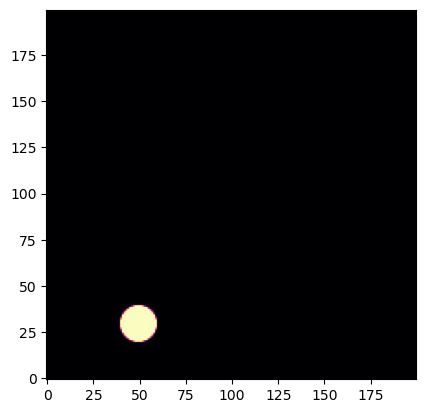

In [22]:
velocity, smoke = step(velocity, smoke)
pylab.imshow(np.asarray(smoke.values.numpy('y,x')),
    origin='lower', cmap='magma')

In [23]:
steps = []
steps = [[smoke.values, velocity.values.vector[0],
velocity.values.vector[1] ]]

imz = []
for t in tqdm(range(run_time)):
    velocity, smoke = step(velocity,smoke)
    smoke_values_extracted = smoke.values.numpy("y,x")
    steps.append( [smoke.values, velocity.values.vector[0],
    velocity.values.vector[1]])

  0%|          | 0/150 [00:00<?, ?it/s]c:\Users\edwar\anaconda3\Lib\site-packages\phi\field\_field_math.py:521: FutureWarning: Instance checks on Grid are deprecated and will be removed in version 3.0. Use the methods instance.is_grid, instance.is_point_cloud, instance.is_centered and instance.is_staggered instead.
  if isinstance(grid, Grid):
c:\Users\edwar\anaconda3\Lib\site-packages\phi\field\_grid.py:476: FutureWarning: Instance checks on StaggeredGrid are deprecated and will be removed in version 3.0. Use the methods instance.is_grid, instance.is_point_cloud, instance.is_centered and instance.is_staggered instead.
  if isinstance(other, StaggeredGrid) and self.bounds == other.bounds and self.shape.spatial == other.shape.spatial:
c:\Users\edwar\anaconda3\Lib\site-packages\phi\field\_field_math.py:835: FutureWarning: Instance checks on PointCloud are deprecated and will be removed in version 3.0. Use the methods instance.is_grid, instance.is_point_cloud, instance.is_centered and ins

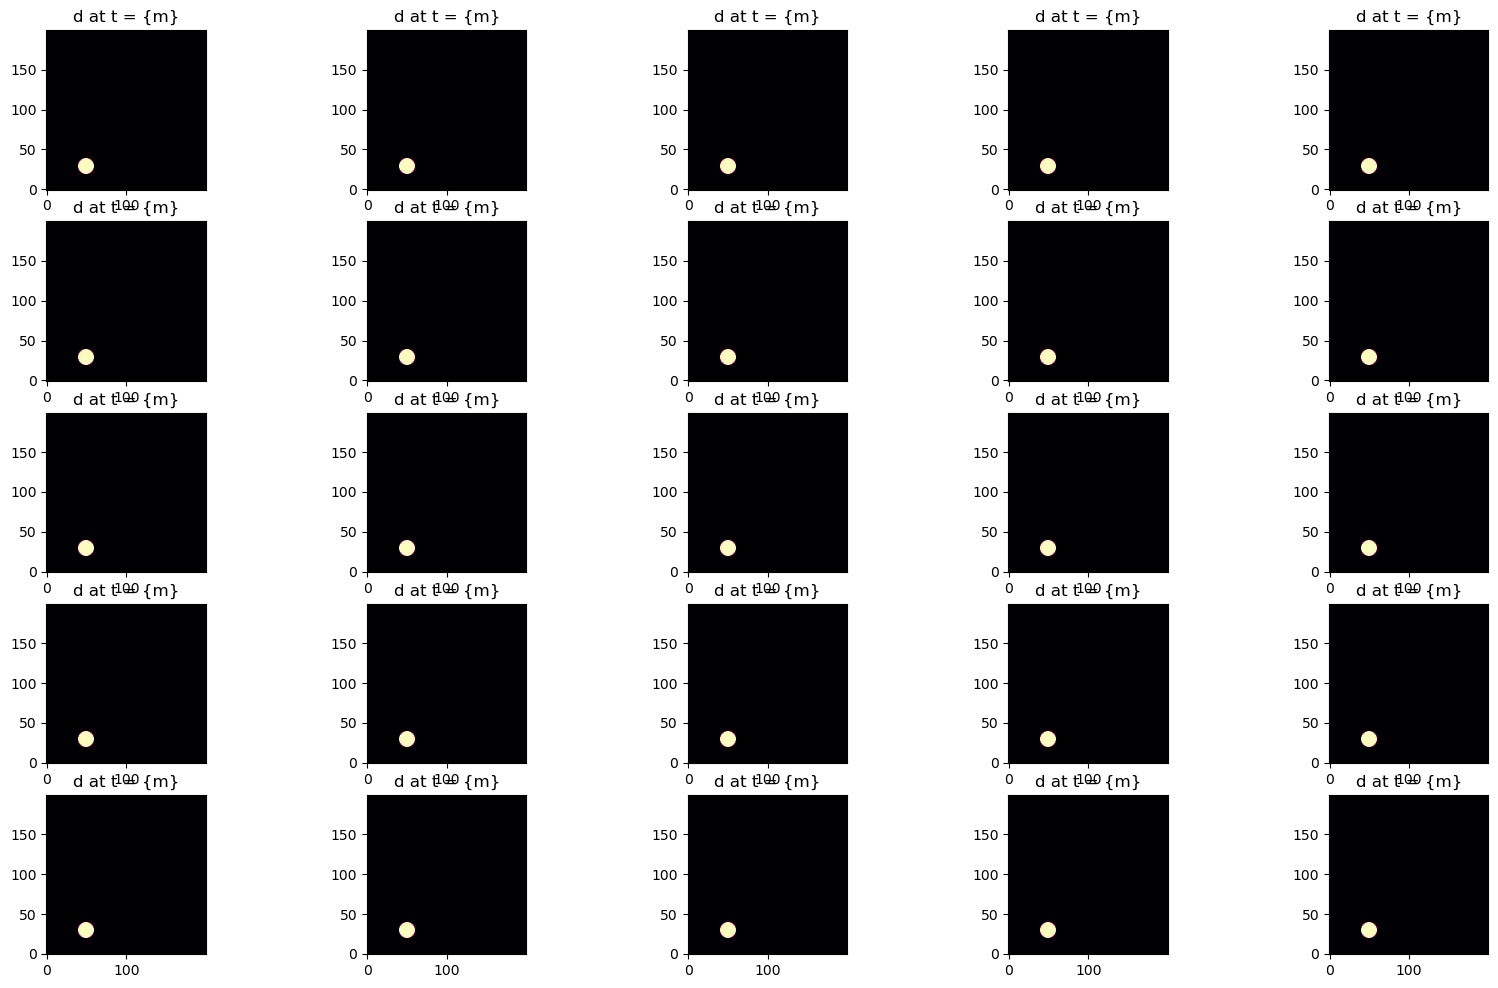

In [25]:
fig, axes = pylab.subplots(5, 5, figsize=(20, 12))
m=0
for i in range(5):
    for j in range(5):
        axes[i][j].imshow(steps[m][0].numpy('y,x'), origin='lower', cmap='magma')
        axes[i][j].set_title("d at t = {m}")
        m+5